# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 6: Cellular Automaton
## 04.28.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from scipy import stats
import time
import random
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.animation as animation

In [2]:
sns.set_style(style='white')

In [3]:
def mode_choose(boundary_condition, game_mode):
    
    current_mode = ('..\\Release\\cell.exe' + ' ' +
                    boundary_condition + ' ' +
                    game_mode + ' ' +
                    str(gen_neighbours) + ' ' +
                    str(width_arena) + ' ' +
                    str(height_arena) + ' ' +
                    str(position_x) + ' ' +
                    str(position_y) + ' ' +
                    str(sim_steps) + ' '
                   )

    if(game_mode == 'random'):
        current_mode += (str(width_life) + ' ' +
                         str(height_life)
                        )
        
    elif(game_mode == 'user'):
        current_mode += file_name

    else:
        print('fu')

    return(current_mode)

## Animation

In [31]:
def AnimateLife(video_name):
    
    GameArena = plt.figure(figsize=(width_arena/sliced, height_arena/sliced))
    
    # INPUT DATA SHOULD BE AN ARRAY, SO WE CONVERT INTO IT FROM A LIST
    StartingPoints = np.asarray(data_cell[0:height_arena,])

    # CREATE A FULL NULL-MATRIX IN THE SIZE OF THE FULL ARRAY
    Background = np.zeros_like(StartingPoints)

    # SET ARENA AXES (FROM MATPLOTLIB.ORG)
    ax = GameArena.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

    # FROM STACKOVERFLOW, PLOTTING BINARY MATRIX WITH WHITE AND BLACK SQUARES
    # ON STACKOVERFLOW IT WAS AN EXAMPLE FOR ANIMATING A FRACTAL
    Image = ax.imshow(StartingPoints, cmap='Greys', interpolation='nearest')

    # WE SHOULD INITIALIZE THE PLOTTING ANIMATION WITH A BACKGROUND FIRST IN MATPLOTLIB'S FuncAnimation
    # THIS IS NECESSARY, BECAUSE THE ANIMATION WOULD ONLY SHOW ONLY ONE FRAME, AND WE DON'T WANT IT
    # THIS IS FROM THE EXAMPLE CODES FROM MATPLOTLIB'S OFFICIAL PAGE
    def InitFunc():
        Image.set_data(Background)
        return Image,

    # STEPPING THE LIFE AND UPDATING THE IMAGE
    def GenerationUpdate(x):
        Image.set_data(GenerationUpdate.StartingPoints)
        GenerationUpdate.StartingPoints = np.asarray(data_cell[height_arena*x:height_arena*(x + 1),])
        return Image,

    # SET UP FORMATTING FOR MOVIE FILES FROM MATPLOTLIB'T HOME PAGE
    # FFMPEG NEEDED!!!
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='PB'), bitrate=1800)

    # ANIMATE THE OBJECT
    GenerationUpdate.StartingPoints = StartingPoints
    anim = animation.FuncAnimation(GameArena, GenerationUpdate, sim_steps, interval=50, init_func=InitFunc, blit=True)
    anim.save('.\\videos\\' + video_name + '.mp4', writer=writer)
    plt.show()

## Draw image

In [67]:
input_image = plt.imread('cica.bmp')/255

In [78]:
h = input_image.shape[0]
w = input_image.shape[1]
new_array = np.zeros((h, w))
for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
        new_array[i][j] = 1 - input_image[i,j,][0]

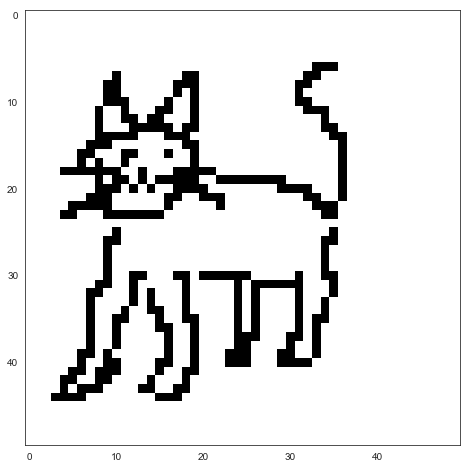

In [79]:
plt.figure(figsize=(8,8))
plt.imshow(new_array, cmap='Greys')
plt.show()

In [91]:
np.savetxt('..\\Release\\cica.txt', X=new_array, fmt='%1.0f')

## Initial conditions

In [92]:
# Exact number of neighbours to generate new cell (N)
gen_neighbours = 2
# Width of the game arena [pixels]
width_arena = 100
# Height of the game arena [pixels]
height_arena = 100
# Position of random life at start along X axis
position_x = 5
# Position of random life at start along Y axis
position_y = 5
# Total number of simulated steps
sim_steps = 63
# Width of the random life [pixels]
width_life = 3
# Height of the random life [pixels]
height_life = 3
# Input file's name
#file_name = '\"E:\\Documents\\GitHub\\ELTE_Comp_Simulations_2019\\VI. Cellular Automaton\\Release\\input.dat\"'
file_name = '\"C:\\Users\\masterdesky\\Documents\\GitHub\\ELTE_Comp_Simulations_2019\\VI. Cellular Automaton\\Release\\cica.txt\"'
sliced = 4

In [93]:
current_mode = mode_choose(boundary_condition = 'periodic', game_mode = 'user')
os.system(current_mode)
print('sent command: {0}'.format(current_mode))
data_cell = np.genfromtxt('cell.dat')

sent command: ..\Release\cell.exe periodic user 2 100 100 5 5 63 "C:\Users\masterdesky\Documents\GitHub\ELTE_Comp_Simulations_2019\VI. Cellular Automaton\Release\cica.txt"


In [30]:
'''
nrows = sim_steps//sliced + 1
ncols = sliced
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width_arena/sliced, nrows*height_arena/sliced))

titlesize = 30
axisticksize = 20

for i in range(0, nrows):
    for j in range(0, ncols):
        
        if(i*ncols + j + 1 <= sim_steps):
            axes[i][j].imshow(data_cell[height_arena*(i*ncols + j):height_arena*(i*ncols + j + 1),])

            axes[i][j].set_title('Frame #{0}'.format(i*ncols + j), fontsize=titlesize)
            
            axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)

        else:
            axes[i][j].remove()

fig.tight_layout()
plt.show()
''';

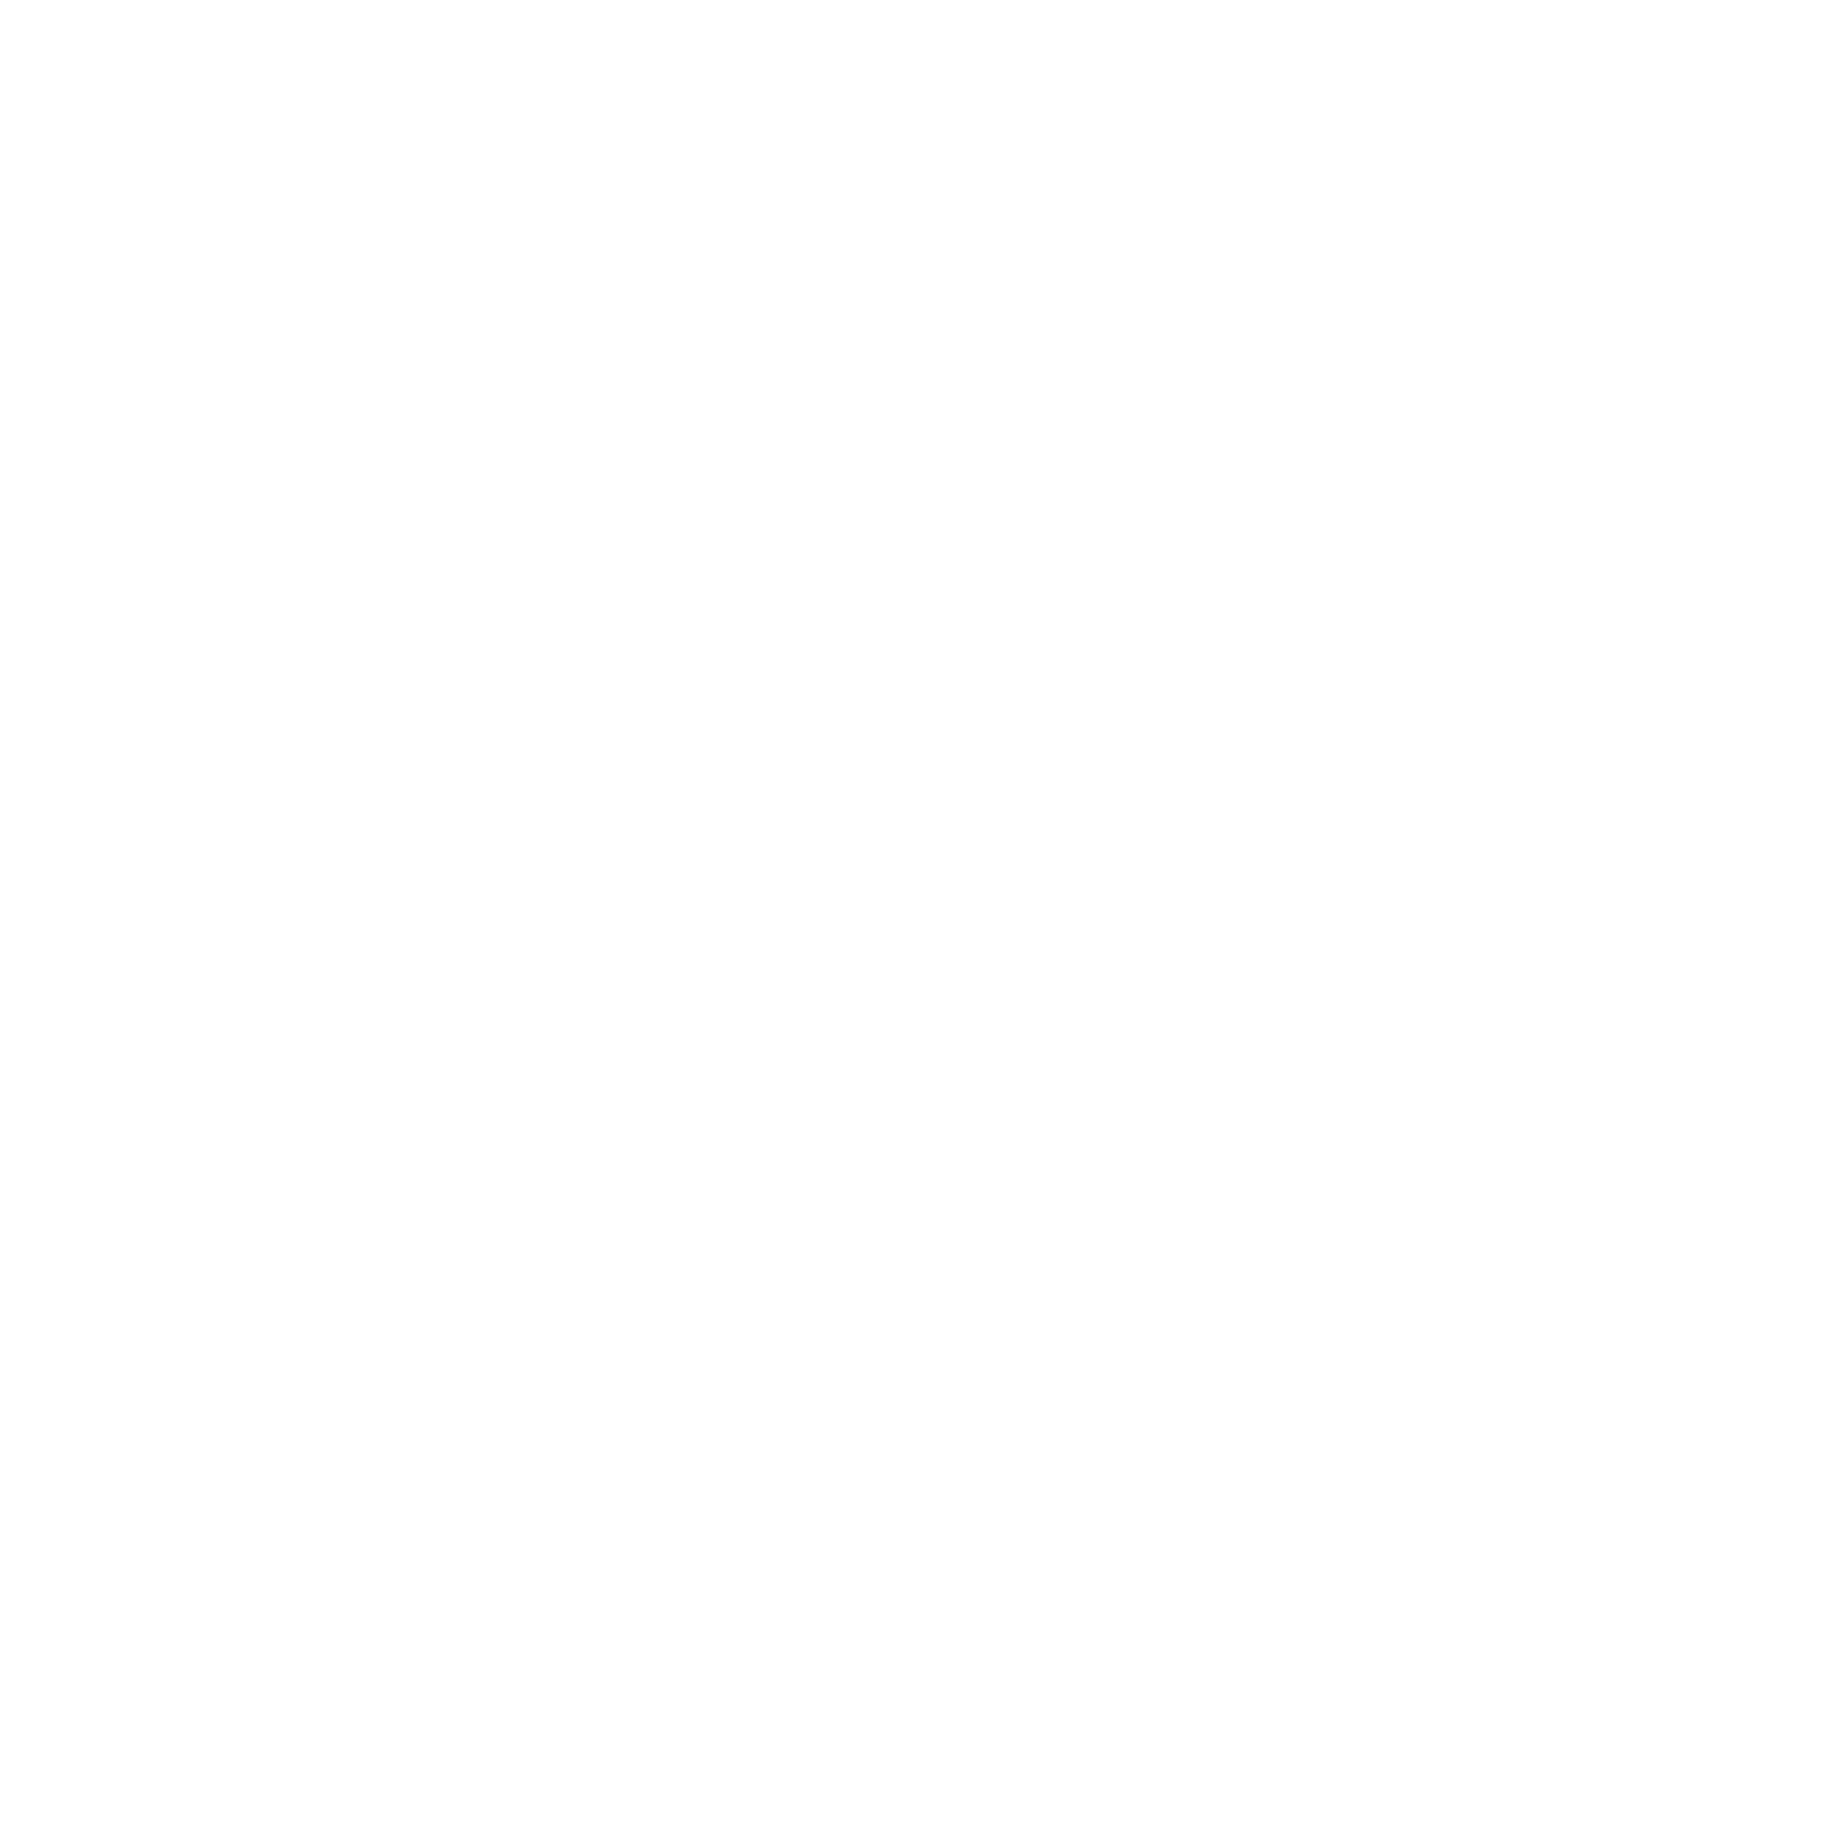

In [94]:
AnimateLife(video_name = 'cica_n2')

# Sand pile automaton